<a href="https://colab.research.google.com/github/Sahilshajahan/spatial_data_analysis/blob/main/semi_veriogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''

Different Types of Kriging
-ordinary kriging
-simple    "
-universal "
-regression,etc

Different Types of Semi-Variogram/Covariance models
-exponential
-spherical
-gaussian
-theoritical, etc

'''

# For kriging the data should be in PCS 

'\n\nDifferent Types of Kriging\n-ordinary kriging\n-simple    "\n-universal "\n-regression,etc\n\nDifferent Types of Semi-Variogram/Covariance models\n-exponential\n-spherical\n-gaussian\n-theoritical, etc\n\n'

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 29.5 MB/s 
     |████████████████████████████████| 7.8 MB 75.0 MB/s 
     |████████████████████████████████| 16.6 MB 54.4 MB/s 


In [ ]:
!pip install scikit-gstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 686 kB 27.5 MB/s 
  Created wheel for scikit-gstat: filename=scikit_gstat-1.0.8-py3-none-any.whl size=701323 sha256=f32148d6b35f83306312b8b69d39fcd62b732e1f76414755cbf0642abfad777a
  Stored in directory: /root/.cache/pip/wheels/10/fb/76/7f48b50e9a92bfeaba8e2d20ee24596ba02fb657d0d3d8ea0e
Successfully built scikit-gstat


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

#skgstat = scikit-gstat
import skgstat as skg
from skgstat import Variogram 

import matplotlib.pyplot as plt


In [ ]:
data=gpd.read_file(r"/content/Temp_43N.shp")

In [ ]:
data

,Id,Temp_DC,geometry
0,1,32.20,POINT (687133.984 968795.752)
1,2,32.22,POINT (690207.021 969533.523)
2,3,32.34,POINT (693417.980 968758.858)
3,4,32.78,POINT (696605.298 972984.960)
4,5,32.96,POINT (699076.821 976220.983)
...,...,...,...
76,83,35.23,POINT (724719.386 952795.954)
77,85,30.53,POINT (722984.682 940287.824)
78,86,30.85,POINT (721523.878 942296.429)
79,86,32.54,POINT (730288.700 947044.040)


In [ ]:
#Extracting x,y coordinates
x=data.geometry.x
y=data.geometry.y

In [ ]:
x

0     687133.983726
1     690207.021264
2     693417.979807
3     696605.298323
4     699076.820576
          ...      
76    724719.386286
77    722984.682033
78    721523.878452
79    730288.699941
80    736040.614044
Length: 81, dtype: float64

In [ ]:
y

0     968795.752255
1     969533.523005
2     968758.858469
3     972984.959925
4     976220.983306
          ...      
76    952795.954443
77    940287.823775
78    942296.428700
79    947044.040340
80    941292.126237
Length: 81, dtype: float64

In [ ]:
z=data.Temp_DC
z

0     32.20
1     32.22
2     32.34
3     32.78
4     32.96
      ...  
76    35.23
77    30.53
78    30.85
79    32.54
80    37.95
Name: Temp_DC, Length: 81, dtype: float64

In [ ]:
data.crs

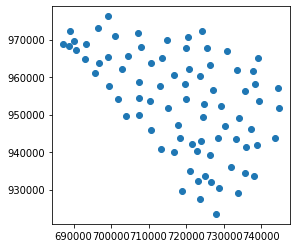

In [ ]:
data.plot()

In [ ]:
df=pd.DataFrame(x,columns=['long']) 
df

,long
0,687133.983726
1,690207.021264
2,693417.979807
3,696605.298323
4,699076.820576
...,...
76,724719.386286
77,722984.682033
78,721523.878452
79,730288.699941


In [ ]:
df['lat']=y
df

,long,lat
0,687133.983726,968795.752255
1,690207.021264,969533.523005
2,693417.979807,968758.858469
3,696605.298323,972984.959925
4,699076.820576,976220.983306
...,...,...
76,724719.386286,952795.954443
77,722984.682033,940287.823775
78,721523.878452,942296.428700
79,730288.699941,947044.040340


In [ ]:
df["Temp_DC"]=z
z

0     32.20
1     32.22
2     32.34
3     32.78
4     32.96
      ...  
76    35.23
77    30.53
78    30.85
79    32.54
80    37.95
Name: Temp_DC, Length: 81, dtype: float64

In [ ]:
'''if we have long-lat separately in the table we can add to the data frame like this as well'''

# df['lat'] = data.Latitude
# df

'if we have long-lat separately in the table we can add to the data frame like this as well'

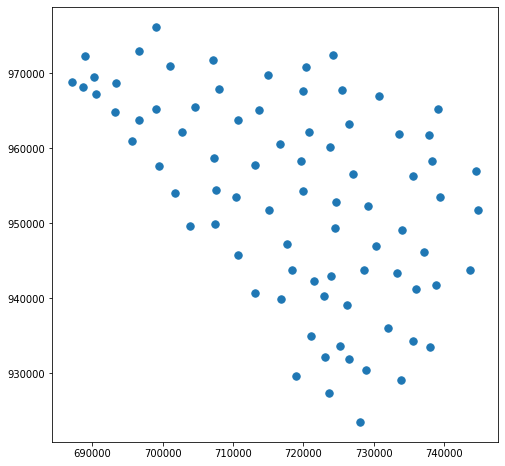

In [ ]:
fig=plt.figure(figsize=(8,8))
plt.scatter(df.long,df.lat,55,cmap='plasma')

In [ ]:
'''Estimator used here is Matheron which is a default estimator'''
v=skg.Variogram(df[['long','lat']].values, df['Temp_DC'].values)
print(v)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   62571.63
Sill:              5.40
Nugget:            0.00
        


<function matplotlib.pyplot.close(fig=None)>

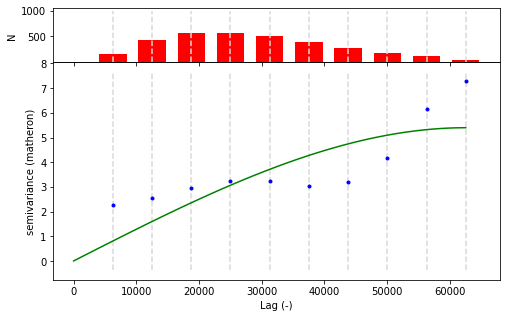

In [ ]:
v.plot()
plt.close

In [ ]:
#ORDINARY KRIGING
from skgstat import OrdinaryKriging

In [ ]:
ok=OrdinaryKriging(v,min_points=5,max_points=20,mode='exact')

In [ ]:
#determine xmin,xmax,ymin,ymax from our dataset
xv=df['long'].values
yv=df['lat'].values

xmin,xmax=min(xv),max(xv)
ymin,ymax=min(yv),max(yv)

#determine the resolution in x direction
res_x=30
#determine the resolution in y direction
#based in the res_x to make regular grid
res_y=30

# we build the grid
xx,yy=np.mgrid[xmin:xmax:complex(res_x),ymin:ymax:complex(res_y)]

In [ ]:
kriging_result =ok.transform(xx.flatten(),yy.flatten()).reshape(xx.shape)
#We also calculate the kriging error on our grid
kriging_error = ok.sigma.reshape(xx.shape)

In [ ]:
kriging_result

array([[34.84470326, 34.86987513, 34.78993034, 34.77036674, 35.02478037,
        34.99683941, 35.00342081, 35.00211011, 34.46513152, 34.31792418,
        34.23865732, 34.18895168, 34.13853316, 34.07964295, 34.02620471,
        33.97643491, 33.81601403, 33.7986166 , 33.78179412, 33.76072563,
        33.74348755, 33.71176502, 33.66687949, 33.50109687, 33.10989312,
        32.23273457, 32.49190876, 32.7241785 , 32.77997876, 32.78576987],
       [34.90006042, 34.96806536, 34.94121838, 34.88854096, 35.0858986 ,
        35.14087188, 35.00439856, 34.99969747, 34.8574598 , 34.48367153,
        34.32328932, 34.24431991, 34.19043544, 34.13871874, 34.06964954,
        34.02149675, 33.86933089, 33.86417331, 33.85752706, 33.85813307,
        33.8734129 , 33.89429546, 33.92741398, 33.92129289, 33.83786938,
        33.03621981, 32.57919656, 32.95991025, 32.84504472, 32.8094869 ],
       [35.31198378, 35.06589766, 35.08781536, 35.05766634, 35.04295306,
        35.17445051, 35.17427683, 35.00325534, 34

In [ ]:
kriging_error

array([[5.58620825e+00, 5.39318025e+00, 5.19534342e+00, 4.95599293e+00,
        4.77076395e+00, 4.56756583e+00, 4.32981393e+00, 4.10264968e+00,
        4.00218906e+00, 3.77006395e+00, 3.53615453e+00, 3.30512710e+00,
        3.07825316e+00, 2.89294536e+00, 2.66207048e+00, 2.43611504e+00,
        2.22387424e+00, 1.99807640e+00, 1.77457663e+00, 1.55235342e+00,
        1.32992420e+00, 1.10322748e+00, 8.67938507e-01, 6.07223039e-01,
        3.18737015e-01, 3.90905722e-02, 3.04055399e-01, 4.04545134e-01,
        6.61467411e-01, 1.00452068e+00],
       [5.32661467e+00, 5.12656160e+00, 4.92313800e+00, 4.72227752e+00,
        4.49481797e+00, 4.28767622e+00, 4.07968530e+00, 3.84496724e+00,
        3.74794017e+00, 3.48819638e+00, 3.25624720e+00, 3.02255547e+00,
        2.79459717e+00, 2.57209486e+00, 2.37771525e+00, 2.15506008e+00,
        1.94545047e+00, 1.72411512e+00, 1.50553966e+00, 1.29001751e+00,
        1.07915533e+00, 8.70633821e-01, 6.57961560e-01, 4.26687979e-01,
        1.87252657e-01,

In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.1 MB/s 


In [ ]:
import rasterio
from rasterio.plot import show

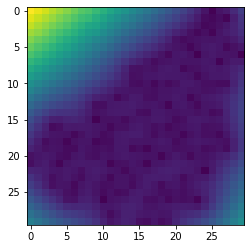

In [ ]:
show(kriging_error)

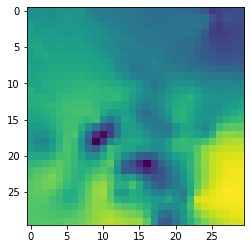

In [ ]:
show(kriging_result)